# **Analyse Health and Demographic Data to identify common traits leading to Heart Disease**
- *Mentored Project under Practo*

## **Importing Libraries & Git Automation**

In [ ]:
# Importing Libraries
%%capture

!pip install python-dotenv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(17)

import gdown, os, pytz
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')       # Comment this if you are a Guest

pd.set_option("display.max_columns",None)

In [ ]:
# Git Automation - Notebook AutoUpdate to Git Script
%%capture

if not os.path.exists("/content/NotebookAutoUpdateGithub.py"):
    !wget https://raw.githubusercontent.com/parth-f/Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease/main/NotebookAutoUpdateGithub.py
import NotebookAutoUpdateGithub as autoup

autoup.upload_to_github(
    github_token=os.getenv('SecretKey'), repo_owner="parth-f",
    repo_name="Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease",
    file_path="/content/drive/MyDrive/Colab Notebooks/Analyse_Health_and_Demogrphic_Data_to_identify_common_traits_leading_to_Heart_Disease-Practo_Certified.ipynb",
    commit_message=f"Autoupdate to Github at {autoup.my_date_time()}"
)

# **1. Data Ingestion**

In [ ]:
datasets = {
    "LLCP2019.XPT": "https://drive.google.com/uc?id=1qbyAIv1AGF6f4WwY-HyVaPIz2kxZWt25",
    "LLCP2021.XPT": "https://drive.google.com/uc?id=1gzWYlVUZXB2CQeOvlaPo0J1kvA1QoIjB",
    "LLCP2023.XPT": "https://drive.google.com/uc?id=1FPovO1ZkKvxmMzVHx0U8Oqy5hOJIE7QV"
}

for data, data_url in datasets.items():
    if not os.path.exists(data):
      !cp /content/drive/MyDrive/Project/Heart_ML/Data/* /content/    # For Owner
      # gdown.download(data_url, quiet=True)                             # For Guest - Use this to run if you are a guest running this notebook

    df_name = f"df{data[-6:-4]}"
    if df_name not in locals():
        locals()[df_name] = pd.read_sas(data, format='xport', encoding='utf-8')
        print(f"{df_name} Dataframe created.")
    else:
        print(f"{df_name} Dataframe already exists.")

In [ ]:
# Columns Name
print( str(df23.shape[1]) + " Columns = " +  str(df23.columns.tolist()))

## **Feature Selection**

- Reduced the / from over 300 features to 21 key features by eliminating irrelevant, redundant, and highly correlated columns.
- Retained only meaningful features to ensure relevance and improve the quality of data analysis.

**Selected Features**

- Additionally, rename the variable for better readability


| #  | Original Var. Name   | Variables Rename     | Variable Description                                  |
|----|----------------------|----------------------|-------------------------------------------------------|
| 1  | _MICHD               | **HRT_DIS**          | Ever had Coronary Heart Disease                       |
| 2  | _BMI5                | **BMI**              | Body Mass Index                                       |
| 3  | _AGEG5YR             | **AGE**              | Age in five-year age categories calculated variable (13 groups) |
| 4  | _SEX                 | **GENDER**           | Sex variable - (Male, Female)                         |
| 5  | CVDSTRK3             | **STROKE**           | Ever Diagnosed with a Stroke                          |
| 6  | DIABETE4             | **DIABETES**         | Ever told you had diabetes                            |
| 7  | _LTASTH1             | **ASTHMA**           | Ever told you had asthma                              |
| 8  | GENHLTH              | **GENERAL_HLTH**     | General Health Status                                 |
| 9  | MENTHLTH             | **MENTHLTH_BAD**      | Mental Health Status                                  |
| 10 | PHYSHLTH             | **PHYSHLTH_BAD**    | Days Physical Health Not Good                         |
| 11 | DIFFWALK             | **DIFFICUTLY_WALK**  | Do you have serious difficulty walking or climbing stairs? |
| 12 | _SMOKER3             | **SMOKING**          | Four-level Smoker status                              |
| 13 | _EDUCAG              | **EDUCATION_LVL**    | Level of education completed                          |
| 14 | MARITAL              | **MARITAL_STATE**          | Marital Status                                        |
| 15 | _CHLDCNT             | **NUM_CHILDERN**     | Number of children in household                       |
| 16 | _URBSTAT             | **URBAN/RURAL**      | Urban/Rural Status                                    |
| 17 | CHCKDNY2             | **KIDNEY_DISEASE**   | Ever told you have kidney disease?                    |
| 18 | _RFHYPE / _RFHYPE6   | **HIGH_BP**          | Ever Told Blood Pressure High                         |
| 19 | TOLDHI2 / TOLDHI3    | **HIGH_CHO**         | High Cholesterol                                      |
| 20 | _RFDRHV7 / _RFDRHV8  | **DRINKING**         | Heavy Alcohol Consumption                             |
| 21 | _INCOMG / _INCOMG1   | **INCOME_LVL**       | Income categories                                     |


In [ ]:
# List of Selected Feature
selected_var19 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX'    , 'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   '_RFHYPE5', 'TOLDHI2' ,'_RFDRHV7', '_INCOMG'   ]

selected_var21 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX'    , 'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   '_RFHYPE6', 'TOLDHI3' ,'_RFDRHV7', '_INCOMG1'  ]

selected_var23 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX'    , 'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   '_RFHYPE6', 'TOLDHI3' , '_RFDRHV8', '_INCOMG1'  ]

In [ ]:
# Dataframe updates with Selected Featuers
df19 = df19[selected_var19]
df23 = df23[selected_var23]
df21 = df21[selected_var21]

In [ ]:
# Variables Rename Dictonary
var_rename = {
    "_MICHD"   : "HRT_DIS",            "_BMI5"    : "BMI",                  "_AGEG5YR" : "AGE",
    "_SEX"     : "GENDER",             "CVDSTRK3" : "STROKE",               "DIABETE4" : "DIABETES",
    "_LTASTH1" : "ASTHMA",             "GENHLTH"  : "GENERAL_HLTH",         "MENTHLTH" : "MENTHLTH_BAD",
    "PHYSHLTH" : "PHYSHLTH_BAD",       "DIFFWALK" : "DIFFICUTLY_WALK",      "_SMOKER3" : "SMOKING",
    "_EDUCAG"  : "EDUCATION_LVL",      "MARITAL"  : "MARITAL_STATE",        "_CHLDCNT" : "NUM_CHILDERN",
    "_URBSTAT" : "URBAN/RURAL",        "CHCKDNY2" : "KIDNEY_DISEASE",       "_RFHYPE5" : "HIGH_BP",
    "_RFHYPE6" : "HIGH_BP",            "TOLDHI2"  : "HIGH_CHOL",            "TOLDHI3"  : "HIGH_CHOL",
    "_RFDRHV7" : "DRINKING",           "_RFDRHV8" : "DRINKING",             "_INCOMG"  : "INCOME_LVL",
    "_INCOMG1" : "INCOME_LVL",
}

In [ ]:
# Rename the Variables
df19.rename(columns=var_rename,inplace =True)
df21.rename(columns=var_rename,inplace =True)
df23.rename(columns=var_rename,inplace =True)

### **1.1 Group Mapping**

In [ ]:
print("Unique Value in df's \n" )
print("df19 - " + str( sorted( df19['INCOME_LVL'].unique().tolist() ) ) )
print("df21 - " + str( sorted( df21['INCOME_LVL'].unique().tolist() ) ) )
print("df23 - " + str( sorted( df23['INCOME_LVL'].unique().tolist() ) ) )

#### **The 2019 Dataset has only 5 Income Groups** :
```
1 ->  Less than $15,000 Notes     
2 ->  $15,000 to < $25,000 Notes   
3 ->  $25,000 to < $35,000 Note    
4 ->  $35,000 to < $50,000 Notes   
5 ->  $50,000 or more Notes        
```
#### **While the 2021 - 23 Dataset has 7 Income Group** :
```
1 ->  Less than $15,000 Notes      
2 ->  $15,000 to < $25,000 Notes   
3 ->  $25,000 to < $35,000 Notes   
4 ->  $35,000 to < $50,000 Notes   
5 ->  $50,000 to < $100,000 Notes  
6 ->  $100,000 to < $200,000 Notes
7 ->  $200,000 or more Notes       
```
- We need to fix this imbalance in the data

In [ ]:
# Printing Count of Values in 5, 6, 7 in df19, df21, df23 respectlively
print(f"df19 =>  5 : {df19['INCOME_LVL'].value_counts()[5]}")
print(f"df21 =>  5 : {df21['INCOME_LVL'].value_counts()[5]}\t 6 : {df21['INCOME_LVL'].value_counts()[6]}\t 7 : {df21['INCOME_LVL'].value_counts()[7]}")
print(f"df23 =>  5 : {df23['INCOME_LVL'].value_counts()[5]}\t 6 : {df23['INCOME_LVL'].value_counts()[6]}\t 7 : {df23['INCOME_LVL'].value_counts()[7]}")

In [ ]:
# Counting Values of 5, 6, 7 in df21 and df23
cnt5 = df21['INCOME_LVL'].value_counts()[5] + df23['INCOME_LVL'].value_counts()[5]
cnt6 = df21['INCOME_LVL'].value_counts()[6] + df23['INCOME_LVL'].value_counts()[6]
cnt7 = df21['INCOME_LVL'].value_counts()[7] + df23['INCOME_LVL'].value_counts()[7]

# Calculating Ratio of 5:6:7 distrbtion in df21 + df23 datasets
ratio5 = round(float( cnt5 / ( cnt5 + cnt6 + cnt7 )),3)
ratio6 = round(float( cnt6 / ( cnt5 + cnt6 + cnt7 )),3)
ratio7 = round(float( cnt7 / ( cnt5 + cnt6 + cnt7 )),3)

# Ration of 5, 6, 7 in df21 and df23
print( f"Ratio = {ratio5} : {ratio6} : {ratio7}")

#### **Ratio of 5, 6, 7 distribution is  5.3 : 3.5 : 1.1  respectively**

In [ ]:
five_indices = df19[df19['INCOME_LVL'] == 5].index

# Shuffling the indices to ensure randomness
shuffled_indices = np.random.permutation(five_indices)

# Calculating the number of samples for each set based on the 4:1:5 ratio 6:7:5
total_length = len(shuffled_indices)
set6_length = int(total_length * ratio6)  # 3.56/10
set7_length = int(total_length * ratio7)  # 1.13/10

# Split the shuffled indices into three sets
set6_indices = shuffled_indices[:set6_length]
set7_indices = shuffled_indices[set6_length : set6_length + set7_length]

df19.loc[set6_indices, 'INCOME_LVL'] = 6
df19.loc[set7_indices, 'INCOME_LVL'] = 7

In [ ]:
# Printing Count of Values in 5, 6, 7 in df19, df21, df23
print(f"df19 =>  5 : {df19['INCOME_LVL'].value_counts()[5]}\t 6 : {df19['INCOME_LVL'].value_counts()[6]}\t 7 : {df19['INCOME_LVL'].value_counts()[7]}")
print(f"df21 =>  5 : {df21['INCOME_LVL'].value_counts()[5]}\t 6 : {df21['INCOME_LVL'].value_counts()[6]}\t 7 : {df21['INCOME_LVL'].value_counts()[7]}")
print(f"df23 =>  5 : {df23['INCOME_LVL'].value_counts()[5]}\t 6 : {df23['INCOME_LVL'].value_counts()[6]}\t 7 : {df23['INCOME_LVL'].value_counts()[7]}")

# **2. Concatinating the Dataframes**

In [ ]:
com_df = pd.concat([df19,df21,df23], axis =0 ,ignore_index=True)

In [ ]:
com_df.shape

# **3. Data Cleaning**

### **3.1 Removing Unwanted Data & Data Transformation**

In [ ]:
com_df = com_df.dropna()
com_df.shape

In [ ]:
# Custom Column Description Function
def col_description(df,col):
    print("TOTAL COLUMNS : " + str(df[col].shape[0]))
    print(df[col].value_counts())

### **1) HRT_DIS** - Heart Disease

In [ ]:
col_description(com_df,"HRT_DIS")

In [ ]:
# 1 - Yes - Reported having "Heart Disease"
# 2 - No  - Did not report having "Heart Disease"

com_df.loc[:,'HRT_DIS'] = com_df['HRT_DIS'].replace(2,0)
col_description(com_df,"HRT_DIS")

### **2) BMI** - Body Mass Index

In [ ]:
com_df['BMI'].unique()

In [ ]:
# BMI/100 - Example 4018 is 40.18 kg
com_df.loc[:,'BMI'] = com_df['BMI'].div(100).round()
com_df['BMI'].unique()

### **3) AGE** - Age of the Person


 The Age is already Encoded by Age - Age Group.

| Value     | Age Range |
|:----------|:----------|
| 1         | 18 - 24 year old |
| 2         | 25 - 29 year old |
| 3         | 30 - 34 year old |
| 4         | 35 - 39 year old |
| 5         | 40 - 44 year old |
| 6         | 45 - 49 year old |
| 7         | 50 - 54 year old |
| 8         | 55 - 59 year old |
| 9         | 60 - 64 year old |
| 10        | 65 - 69 year old |
| 11        | 70 - 74 year old |
| 12        | 75 - 79 year old |
| 13        | 80 or More year old |

In [ ]:
com_df["AGE"].unique()

In [ ]:
# Removing 14 -> Refused to Answer
com_df = com_df[com_df['AGE'] != 14]
com_df["AGE"].unique()

### **4) GENDER** - Sex of Respondent

In [ ]:
# 1 - Male, 2 - Female
col_description(com_df,"GENDER")

### **5) STROKE** - Had a Stroke

In [ ]:
col_description(com_df,"STROKE")

In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don’t know/Not sure
# 9 - Refused

# Removing 7 and 9
com_df = com_df[com_df['STROKE'] != 7]
com_df = com_df[com_df['STROKE'] != 9]

# Binary Encoding - Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'STROKE'] = com_df['STROKE'].replace(2,0)

col_description(com_df,"STROKE")

### **6) DIABETES** - Ever had Diabetes

In [ ]:
col_description(com_df,"DIABETES")

In [ ]:
# 1 - Yes
# 2 - Yes, Only during Pregancy
# 3 - No
# 4 - Told borderline high or pre-hypertensive or elevated blood pressure
# 7 - Don't  know
# 9 - Refuesed

# Convert 4 to 1 as - Yes, (assume borderline to be approximatly bp high ) so considered / True
# Convert 2 to 0 as - Only during Pregancy, is more related to pregancy than high bp so considerd no, thats why 0 / False
# Convert 3 to 9 as - Binary Encoding - 3 = No, which should be zero as (0 - No, 1- Yes)
com_df.loc[:,'DIABETES'] = com_df['DIABETES'].replace({4:1,2:0,3:0})

# Removing 7 and 9
com_df = com_df[com_df['DIABETES'] != 7]
com_df = com_df[com_df['DIABETES'] != 9]

# Column Value Description
col_description(com_df,"DIABETES")

### **7) ASTHMA** - Ever had Asthma

In [ ]:
col_description(com_df,"ASTHMA")

In [ ]:
# Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'ASTHMA'] = com_df['ASTHMA'].replace({1:0,2:1})

# Removing 9 (Missing)
com_df = com_df[com_df['ASTHMA'] != 9]

col_description(com_df,"ASTHMA")

### **8) GENERAL_HLTH**

In [ ]:
col_description(com_df,"GENERAL_HLTH")

In [ ]:
# 1 - Excellent
# 2 - Very Good
# 3 - Good
# 4 - Fair
# 5 - Poor
# 7 , 9 - Values are Missing / Refused to answer

# Removing 7 and 9
com_df = com_df[com_df['GENERAL_HLTH'] != 7]
com_df = com_df[com_df['GENERAL_HLTH'] != 9]

col_description(com_df,"GENERAL_HLTH")

### **9) MENTHLTH_BAD** - Number of Days Mental Health Not Good

In [ ]:
print("TOTAL COLUMNS : " + str( com_df['MENTHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['MENTHLTH_BAD'].unique()))

In [ ]:
# Removing 9 ( Refused to ans)

# change 88 to 0 because it means none (no bad mental health days)
com_df.loc[:,'MENTHLTH_BAD'] = com_df['MENTHLTH_BAD'].replace(88,0)

com_df = com_df[com_df['MENTHLTH_BAD'] != 77]
com_df = com_df[com_df['MENTHLTH_BAD'] != 99]

print("TOTAL COLUMNS : " + str( com_df['MENTHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['MENTHLTH_BAD'].unique()))

### **10) PHYSHLTH_BAD** - Number of Days Physical Health Not Good

In [ ]:
print("TOTAL COLUMNS : " + str( com_df['PHYSHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['PHYSHLTH_BAD'].unique()))

In [ ]:
# 77 - Don't know for Sure
# 88 - None
# 99 - Refused

# change 88 to 0 because it means none (no phsycial activity)
com_df['PHYSHLTH_BAD'] = com_df['PHYSHLTH_BAD'].replace(88,0)

# Removing 77 and 99
com_df = com_df[com_df['PHYSHLTH_BAD'] != 77]
com_df = com_df[com_df['PHYSHLTH_BAD'] != 99]

print("TOTAL COLUMNS : " + str( com_df['PHYSHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['PHYSHLTH_BAD'].unique()))

### **11) DIFFICUTLY_WALK** - Has Difficulty Walking

In [ ]:
col_description(com_df,"DIFFICUTLY_WALK")

In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don't know
# 9 - Refuseed

# Binary Encoding
com_df.loc[:,'DIFFICUTLY_WALK'] = com_df['DIFFICUTLY_WALK'].replace(2,0)

# Removing 7 and 9
com_df = com_df[com_df['DIFFICUTLY_WALK'] != 7]
com_df = com_df[com_df['DIFFICUTLY_WALK'] != 9]

col_description(com_df,"DIFFICUTLY_WALK")

In [ ]:
com_df.shape

In [ ]:
com_df.columns

### **12) SMOKING** - Smoking Status

In [ ]:
col_description(com_df,"SMOKING")

In [ ]:
# 1 - Everyday Smoker - 4
# 2 - Someday Smoker - 3
# 3 - Former Smoker - 2
# 4 - Never Smoked - 1
# 9 - Refused / Missing

# Revising the Order from Never Smoked to a Smoker
com_df['SMOKING'] = com_df['SMOKING'].replace({1:44, 2:33, 3:22, 4:11})
com_df['SMOKING'] = com_df['SMOKING'].replace({11:1, 22:2, 33:3, 44:4})

# Removing 9
com_df = com_df[com_df['SMOKING'] != 9]

col_description(com_df,"SMOKING")

### **13) EDUCATION_LVL** - Education Level

In [ ]:
col_description(com_df,"EDUCATION_LVL")

In [ ]:
# 1 - Not Graduated High School
# 2 - Graduated High School
# 3 - Attended College
# 4 - Graduated College
# 9 - Don't know / Missing

# Removing 9
com_df = com_df[com_df['EDUCATION_LVL'] != 9]

col_description(com_df,"EDUCATION_LVL")

### **14) MARITAL_STATE** - Marital Status of the Person

In [ ]:
col_description(com_df,"MARITAL_STATE")

In [ ]:
# 1 - Married
# 2 - Divorced
# 3 - Widowed
# 4 - Seperated
# 5 - Never Married
# 6 - A member of an unmarried couple

# 9 - Removing because Refused to ans
com_df = com_df[com_df['MARITAL_STATE'] != 9]

col_description(com_df,"MARITAL_STATE")

### **15) NUM_CHILDERN** - Num of Children

In [ ]:
col_description(com_df,"NUM_CHILDERN")

In [ ]:
# 1 - No childern
# 2 - 1 Child
# 3 - 2 Children
# 4 - 3 Childern
# 5 - 4 Children
# 6 - 5 or More Childern

# 9 - Don't know
com_df = com_df[com_df['NUM_CHILDERN'] != 9]

col_description(com_df,"NUM_CHILDERN")

### **16) URBAN/RURAL** - Does the Person live in Urban or Rural Area

In [ ]:
# 1 - Urban
# 2 - Rural
col_description(com_df,"URBAN/RURAL")

### **17) KIDNEY_DISEASE** - Every Had Kidney Disease

In [ ]:
col_description(com_df,"KIDNEY_DISEASE")

In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don't know
# 9 - Refuseed

# Binary Encoding (No - 0)
com_df.loc[:,'KIDNEY_DISEASE'] = com_df['KIDNEY_DISEASE'].replace(2,0)

# Removing 7 and 9
com_df = com_df[com_df['KIDNEY_DISEASE'] != 7]
com_df = com_df[com_df['KIDNEY_DISEASE'] != 9]

col_description(com_df,"KIDNEY_DISEASE")

### **18) HIGH_BP** - High Blood Pressure

In [ ]:
col_description(com_df,"HIGH_BP")

In [ ]:
# Convert 3 to 9 as - Binary Encoding - 3 = No, which should be zero as (0 - No, 1- Yes)
com_df.loc[:,'HIGH_BP'] = com_df['HIGH_BP'].replace({1:0,2:1})

# Removing 9
com_df = com_df[com_df['HIGH_BP'] != 9]

col_description(com_df,"HIGH_BP")

### **19) HIGH CHOLESTEROL** - High Cholesterol

In [ ]:
col_description(com_df,"HIGH_CHOL")

In [ ]:
# Change 2 to 0 because it is No
com_df.loc[:,'HIGH_CHOL'] = com_df['HIGH_CHOL'].replace(2,0)

# Remove all 7 (dont knows)
# Remove all 9 (refused)
com_df = com_df[com_df['HIGH_CHOL'] != 7]
com_df = com_df[com_df['HIGH_CHOL'] != 9]

col_description(com_df,"HIGH_CHOL")

### **20) DRINKING** - Are you Drinking

In [ ]:
col_description(com_df,"DRINKING")

In [ ]:
# Binary Encoding - Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'DRINKING'] = com_df['DRINKING'].replace({1:0,2:1})

# 9 - Don't know / Refused
com_df = com_df[com_df['DRINKING'] != 9]

col_description(com_df,"DRINKING")

### **21) INCOME_LVL** - Income Level Bracket of the Respondent

In [ ]:
col_description(com_df,"INCOME_LVL")

In [ ]:
# 1 - Less than $ 15,000
# 2 - $15,000 to < $25,000
# 3 - $25,000 to < $35,000
# 4 - $35,000 to < $50,000
# 5 - $50,000 to < $100,000
# 6 - $100,000 to < $200,000
# 7 - $200,000 or More

# 9 - Removing - ( Don't know / Missing val )
com_df = com_df[com_df['INCOME_LVL'] != 9]

col_description(com_df,"INCOME_LVL")

# **4. Data Transformation**

In [ ]:
df = com_df.copy()

In [ ]:
df.shape

### **New Dataframe for Data Analysis**

In [ ]:
vis_df = com_df.copy()

In [ ]:
for x in vis_df.columns:
  print(x + " : \t" + str(vis_df[x].unique()))

In [ ]:
binary_columns = ["HRT_DIS", "STROKE", "DIABETES", "ASTHMA", "DIFFICUTLY_WALK", "KIDNEY_DISEASE", "HIGH_BP", "HIGH_CHOL", "DRINKING"]
vis_df[binary_columns] = df[binary_columns].replace({0: "NO", 1: "YES"})

In [ ]:
vis_df['AGE'] = vis_df['AGE'].replace({1: "18 - 24", 2: "25 - 29", 3: "30 - 34", 4: "35 - 39", 5: "40 - 44",
                                       6: "45 - 49", 7: "50 - 54", 8: "55 - 59", 9: "60 - 64", 10: "65 - 69",
                                       11: "70 - 74", 12: "75 - 79", 13: "80 - 80+"})
vis_df['AGE'] = pd.Categorical(vis_df['AGE'], categories=["18 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49", "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74", "75 - 79", "80 - 80+"], ordered=True)

In [ ]:
vis_df['GENDER'] = vis_df['GENDER'].replace({1: "MALE", 2: "FEMALE"})

In [ ]:
vis_df['GENERAL_HLTH'] = vis_df['GENERAL_HLTH'].replace({1:"Excellent", 2:"Very Good", 3:"Good", 4:"Fair", 5:"Poor"})
vis_df['GENERAL_HLTH'] = pd.Categorical(vis_df['GENERAL_HLTH'], categories=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], ordered=True)

In [ ]:
vis_df['SMOKING'] = vis_df['SMOKING'].replace({1:"Never", 2:"Former", 3:"Someday", 4:"Everyday"})
vis_df['SMOKING'] = pd.Categorical(vis_df['SMOKING'], categories=[ 'Everyday', 'Someday', 'Former', 'Never'], ordered=True)

In [ ]:
vis_df['EDUCATION_LVL'] = vis_df['EDUCATION_LVL'].replace({1:"Attended High School", 2:"Graduated High School", 3:"Attended College", 4:"Graduated College"})
vis_df['EDUCATION_LVL'] = pd.Categorical(vis_df['EDUCATION_LVL'], categories=['Attended High School', 'Graduated High School', 'Attended College', 'Graduated College' ], ordered=True)

In [ ]:
vis_df['MARITAL_STATE'] =  vis_df['MARITAL_STATE'].replace({1:"Married", 2:"Divorced", 3:"Widowed", 4:"Seperated", 5:"Never Married", 6:"Unmarried couple"})

In [ ]:
vis_df['NUM_CHILDERN'] = vis_df['NUM_CHILDERN'].replace({1:"No Children", 2:"1 Child", 3:"2 Children", 4:"3 Children", 5:"4 Children", 6:"5 or More Children"})
vis_df['NUM_CHILDERN'] = pd.Categorical(vis_df['NUM_CHILDERN'], categories=['No Children', '1 Child', '2 Children',  '3 Children', '4 Children', '5 or More Children'], ordered=True)

In [ ]:
vis_df['URBAN/RURAL'] = vis_df['URBAN/RURAL'].replace({1:"Urban", 2:"Rural"})

In [78]:
vis_df['INCOME_LVL'] = vis_df['INCOME_LVL'].replace({1:"Less than $15,000",
                                                     2:"$15,000 - < $25,000",
                                                     3:"$25,000 - < $35,000",
                                                     4:"$35,000 - < $50,000",
                                                     5:"$50,000 - < $100,000",
                                                     6:"$100,000 - < $200,000",
                                                     7:"More than $200,000"})

vis_df['INCOME_LVL'] = pd.Categorical(vis_df['INCOME_LVL'], categories=["Less than $15,000",
                                                                        "$15,000 - < $25,000",
                                                                        "$25,000 - < $35,000",
                                                                        "$35,000 - < $50,000",
                                                                        "$50,000 - < $100,000",
                                                                        "$100,000 - < $200,000",
                                                                        "More than $200,000"], ordered=True)

In [79]:
for x in vis_df.columns:
  print(x + " : \t" + str(vis_df[x].unique()))

HRT_DIS : 	['NO' 'YES']
BMI : 	[ 28.  19.  32.  33.  17.  22.  26.  23.  31.  27.  35.  36.  24.  30.
  16.  34.  41.  37.  25.  20.  42.  39.  21.  29.  55.  43.  40.  18.
  50.  38.  45.  48.  47.  44.  52.  46.  51.  57.  49.  60.  15.  54.
  58.  61.  53.  63.  67.  59.  13.  70.  14.  56.  62.  64.  68.  12.
  69.  72.  74.  65.  66.  92.  75.  79.  80.  82.  73.  86.  87.  88.
  76.  71.  81.  84.  77.  97.  99.  83.  78.  91.  98.  95.  90.  94.
  85.  89. 100.]
AGE : 	['80 - 80+', '70 - 74', '65 - 69', '75 - 79', '50 - 54', ..., '60 - 64', '35 - 39', '30 - 34', '25 - 29', '18 - 24']
Length: 13
Categories (13, object): ['18 - 24' < '25 - 29' < '30 - 34' < '35 - 39' ... '65 - 69' < '70 - 74' <
                          '75 - 79' < '80 - 80+']
GENDER : 	['FEMALE' 'MALE']
STROKE : 	['NO' 'YES']
DIABETES : 	['NO' 'YES']
ASTHMA : 	['NO' 'YES']
GENERAL_HLTH : 	['Good', 'Fair', 'Very Good', 'Poor', 'Excellent']
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very Good' < 'Excellen

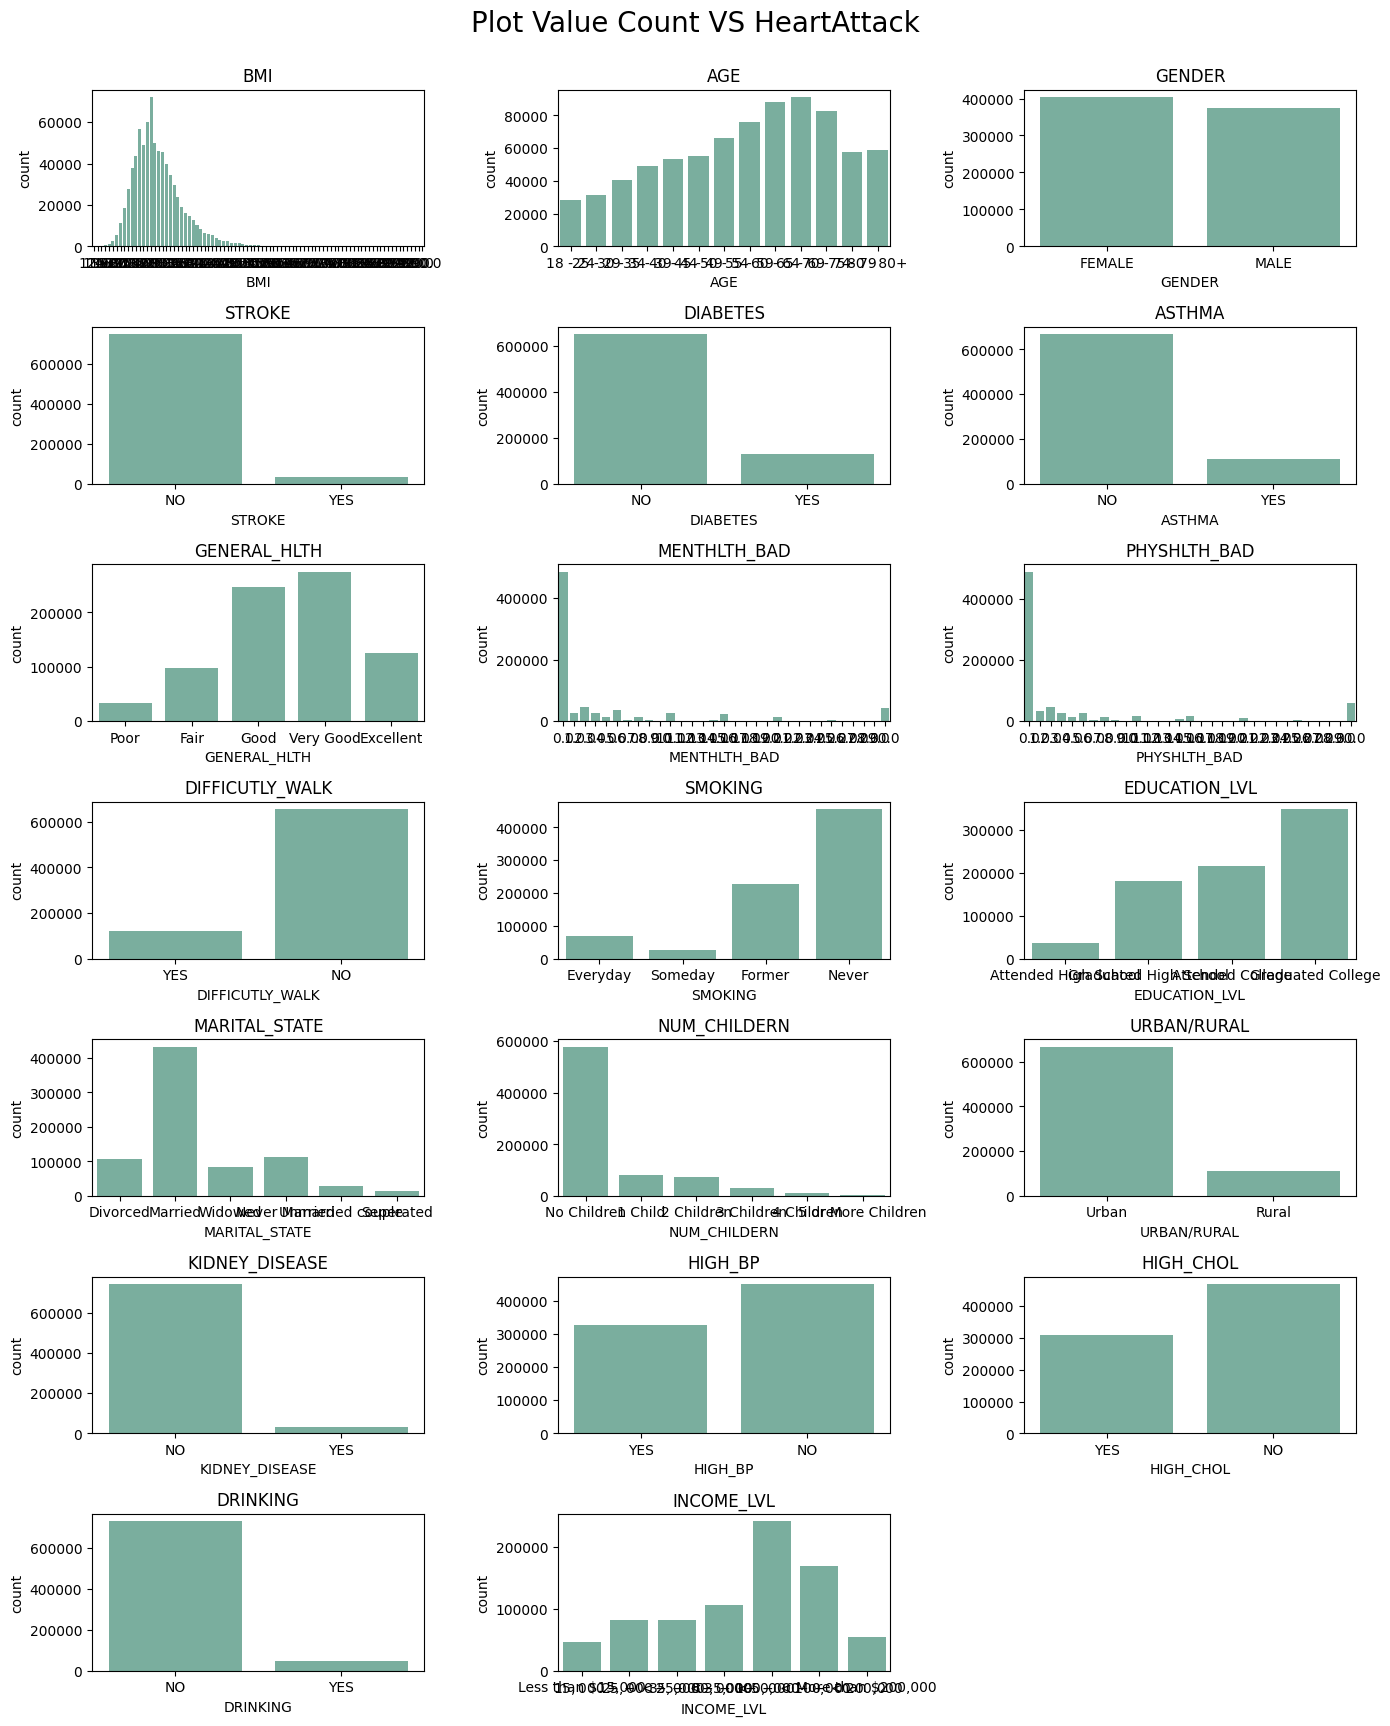

In [84]:
plt.figure(figsize=(14,50))
for i,column in enumerate(vis_df.columns[1:]):
    plt.subplot(len(vis_df.columns), 3, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=vis_df, x=column, color='#72b6a1')
    plt.title(f"{column}")
    plt.tight_layout()

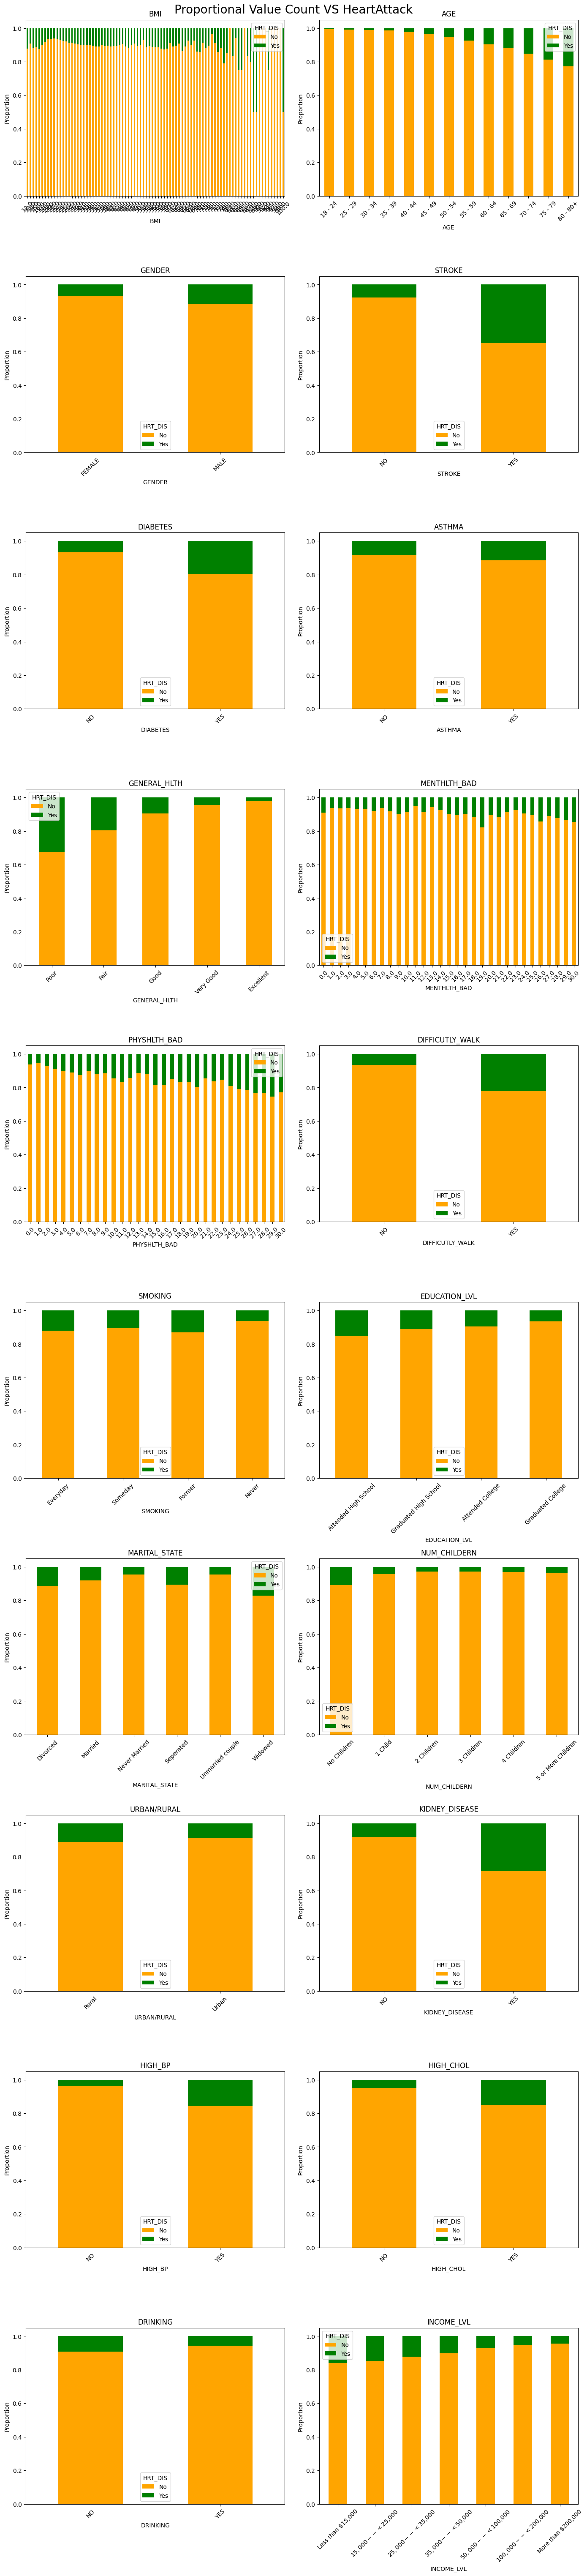

In [86]:
plt.figure(figsize=(14, 6 * (vis_df.shape[1] - 1)))  # Adjusting height based on the number of columns
for i, column in enumerate(vis_df.columns[1:]):
    plt.subplot(len(vis_df.columns) - 1, 2, i + 1)

    # Calculate the normalized count
    count_data = vis_df.groupby(column, observed=False)['HRT_DIS'].value_counts(normalize=True).unstack().fillna(0)

    # Create a bar plot
    count_data.plot(kind='bar', stacked=True, color=['orange', 'green'], ax=plt.gca())

    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title='HRT_DIS', labels=['No', 'Yes'])
    plt.tight_layout()

plt.suptitle("Proportional Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
plt.show()

# **5. Data Analysis**

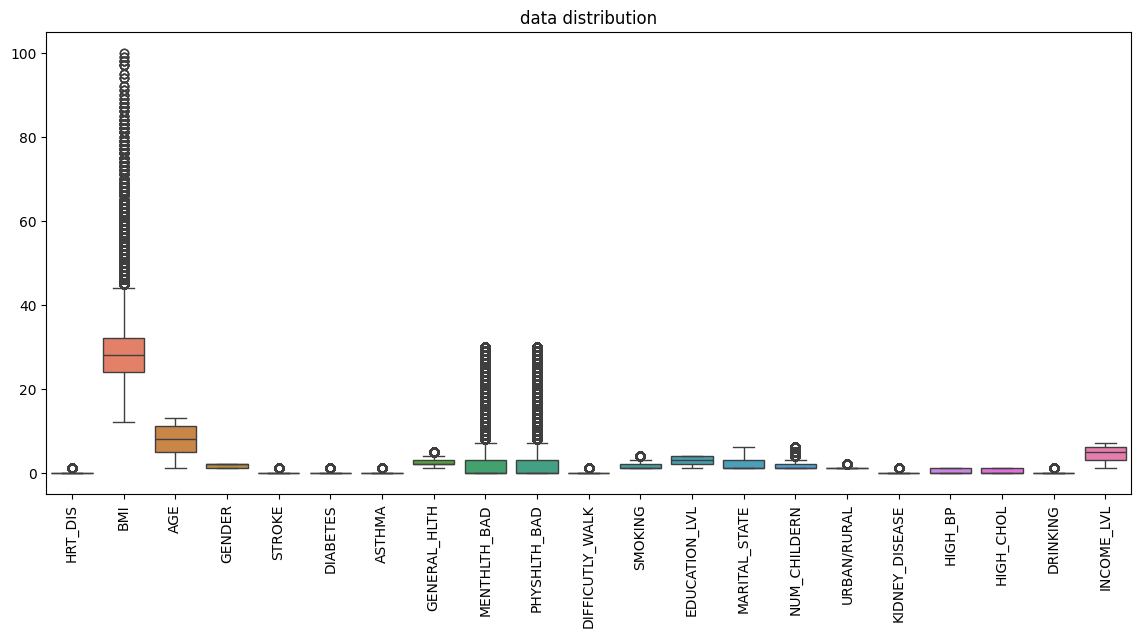

In [ ]:

plt.figure(figsize=(14,6))
sns.boxplot(df)
l=list(np.arange(21))
plt.title("data distribution")
plt.xticks(l, list(df.columns), rotation=90)
plt.show()

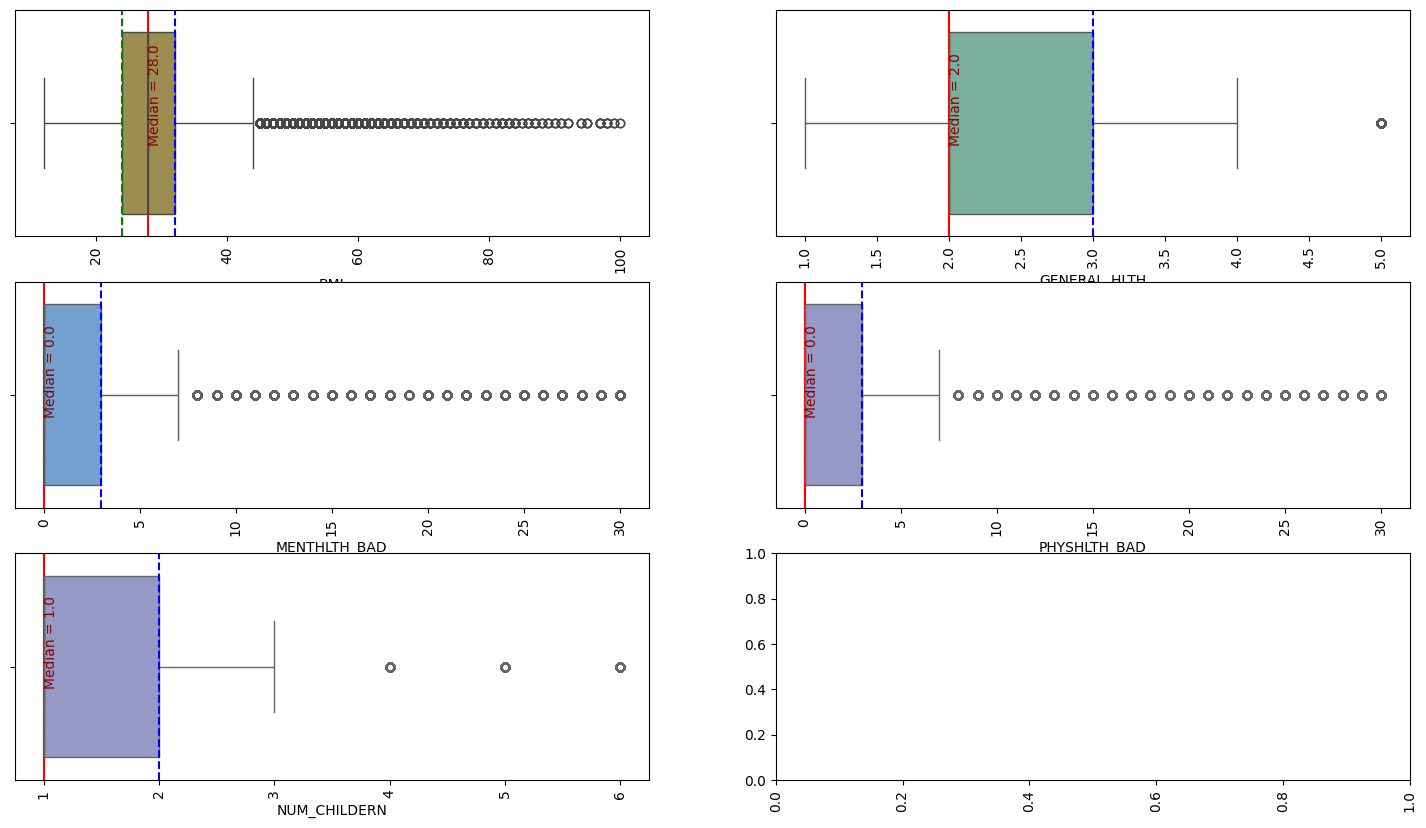

In [ ]:
def plotaxis(pval,paxis):
  q1 = np.percentile(df[pval], 25)
  q2 = np.percentile(df[pval], 50)
  q3 = np.percentile(df[pval], 75)

  paxis.text(q2, 0.1, f'Median = {q2:.1f}', color='darkred', verticalalignment='bottom', rotation=90)

  paxis.axvline(q1, color='green', linestyle='--')
  paxis.axvline(q2, color='red', linestyle='-', label='Q2')
  paxis.axvline(q3, color='blue', linestyle='--')

fig, axes = plt.subplots(3, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], x=df['BMI'], color='#a89444')
# axes[0, 0].set_title('BMI Distribution')
plotaxis('BMI',axes[0, 0])

sns.boxplot(ax=axes[0, 1], x=df['GENERAL_HLTH'], color='#72b6a1')
# axes[0, 1].set_title('General Health Distribution')
plotaxis('GENERAL_HLTH',axes[0, 1])

sns.boxplot(ax=axes[1, 0], x=df['MENTHLTH_BAD'], color='#62a0de')
# axes[1, 0].set_title('Mental Health Distribution')
plotaxis('MENTHLTH_BAD',axes[1, 0])

sns.boxplot(ax=axes[1, 1], x=df['PHYSHLTH_BAD'], color='#8e91ce')
# axes[1, 1].set_title('Physical Health Distribution')
plotaxis('PHYSHLTH_BAD',axes[1, 1])

sns.boxplot(ax=axes[2, 0], x=df['NUM_CHILDERN'], color='#8e91ce')
# axes[2, 0].set_title('NUM_CHILDERN Distribution')
plotaxis('NUM_CHILDERN',axes[2, 0])


for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout
plt.show()

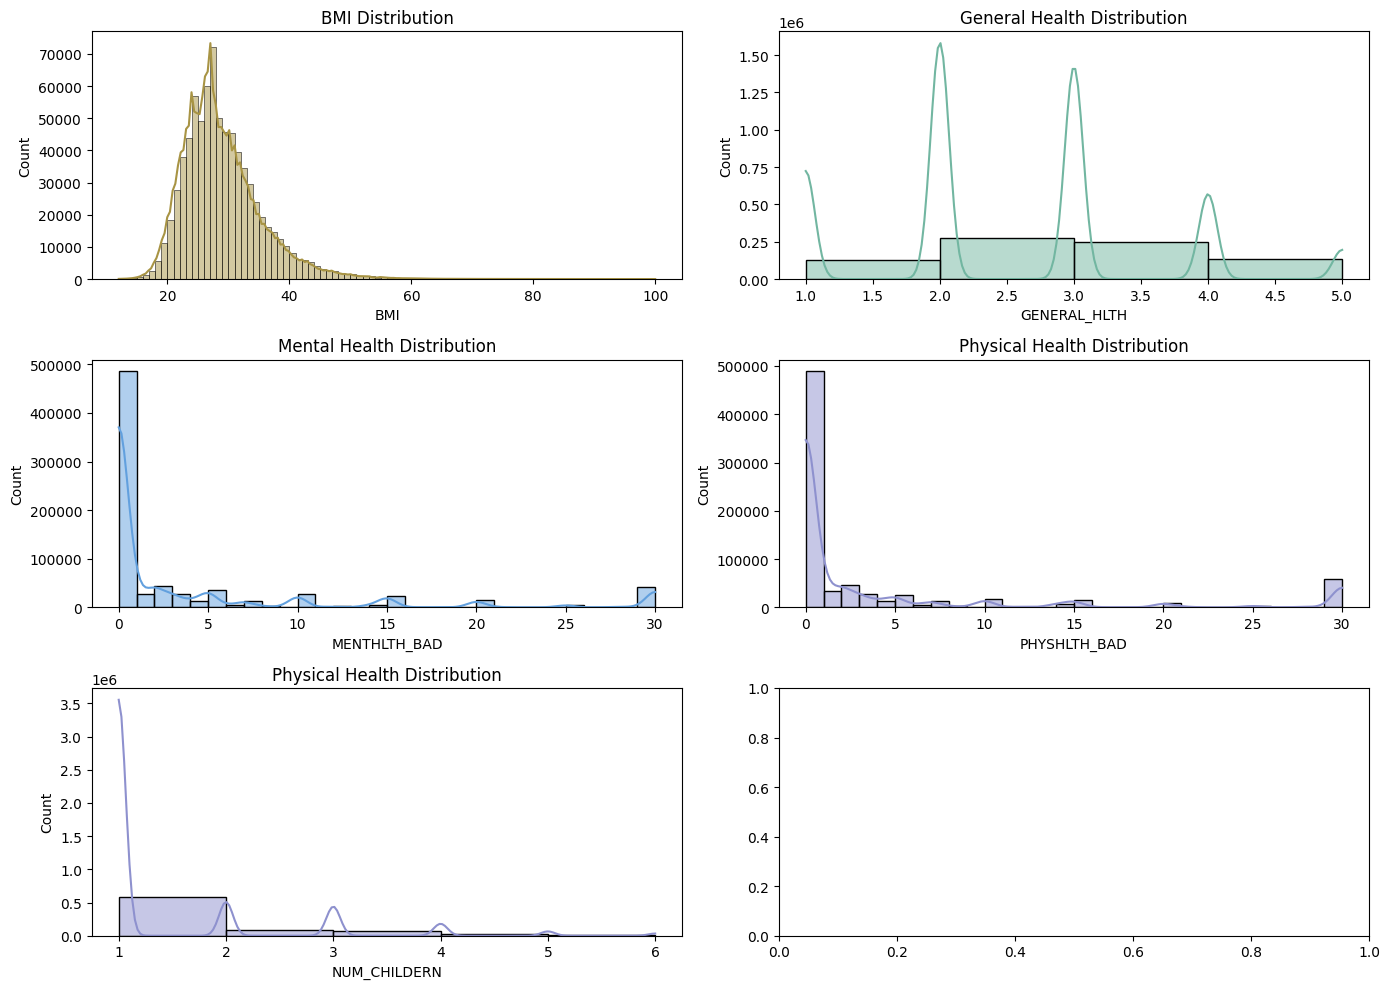

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

sns.histplot(df['BMI'], ax=axes[0, 0], kde=True, binwidth=1, color='#a89444')
axes[0, 0].set_title('BMI Distribution')

sns.histplot(df['GENERAL_HLTH'], ax=axes[0, 1], kde=True, binwidth=1, color='#72b6a1')
axes[0, 1].set_title('General Health Distribution')

sns.histplot(df['MENTHLTH_BAD'], ax=axes[1, 0], kde=True, binwidth=1, color='#62a0de')
axes[1, 0].set_title('Mental Health Distribution')

sns.histplot(df['PHYSHLTH_BAD'], ax=axes[1, 1], kde=True, binwidth=1, color='#8e91ce')
axes[1, 1].set_title('Physical Health Distribution')

sns.histplot(df['NUM_CHILDERN'], ax=axes[2, 0], kde=True, binwidth=1, color='#8e91ce')
axes[2, 0].set_title('Physical Health Distribution')

plt.tight_layout()
plt.show()

## 1. Outlier Flagging

In [ ]:
# BMI _ FLAG
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_BMI'] = ((df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)).astype(int)


In [ ]:
# MENTHLTH_BAD _ FLAG
Q1 = df['MENTHLTH_BAD'].quantile(0.25)
Q3 = df['MENTHLTH_BAD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_MENTHLTH_BAD'] = ((df['MENTHLTH_BAD'] < lower_bound) | (df['MENTHLTH_BAD'] > upper_bound)).astype(int)


In [ ]:
# PHYSHLTH_BAD _ FLAG
Q1 = df['PHYSHLTH_BAD'].quantile(0.25)
Q3 = df['PHYSHLTH_BAD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_PHYSHLTH_BAD'] = ((df['PHYSHLTH_BAD'] < lower_bound) | (df['PHYSHLTH_BAD'] > upper_bound)).astype(int)


In [ ]:
# NUM_CHILDERN _ FLAG
Q1 = df['NUM_CHILDERN'].quantile(0.25)
Q3 = df['NUM_CHILDERN'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_NUM_CHILDERN'] = ((df['NUM_CHILDERN'] < lower_bound) | (df['NUM_CHILDERN'] > upper_bound)).astype(int)


In [ ]:
plt.figure(figsize=(14,8))  # Adjust the figure size as needed
sns.histplot(df, x='BMI', kde=True, binwidth=1 , palette="Set2", hue='SEX')
plt.title('BMI distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret value `SEX` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1400x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,8))  # Adjust the figure size as needed
sns.histplot(df, x='AGE', palette="Set2", hue='SEX', kde =True)
plt.title('BMI distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

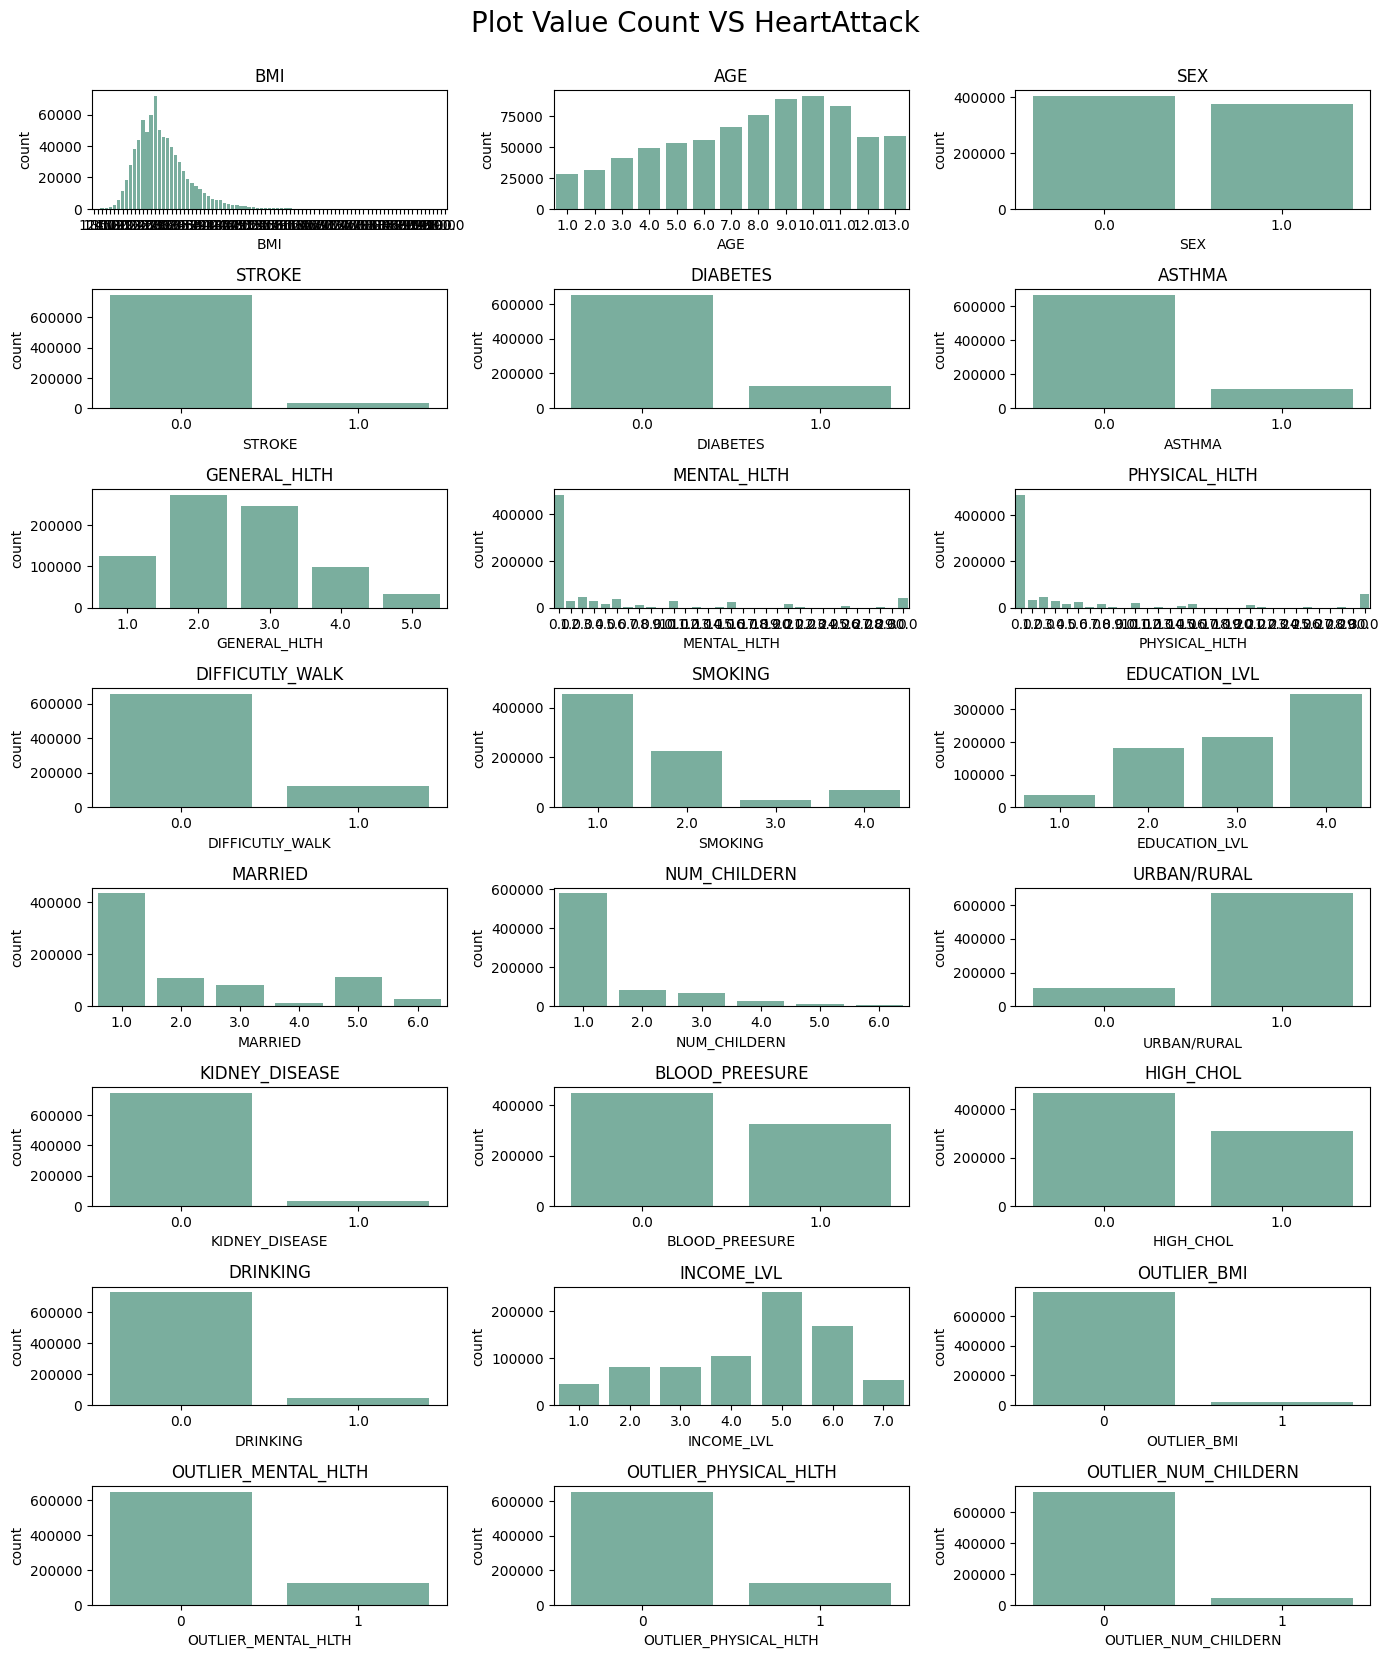

In [ ]:
plt.figure(figsize=(14,50))
for i,column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns), 3, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, color='#72b6a1')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
df.to_csv('output.csv', index=False, header=True)

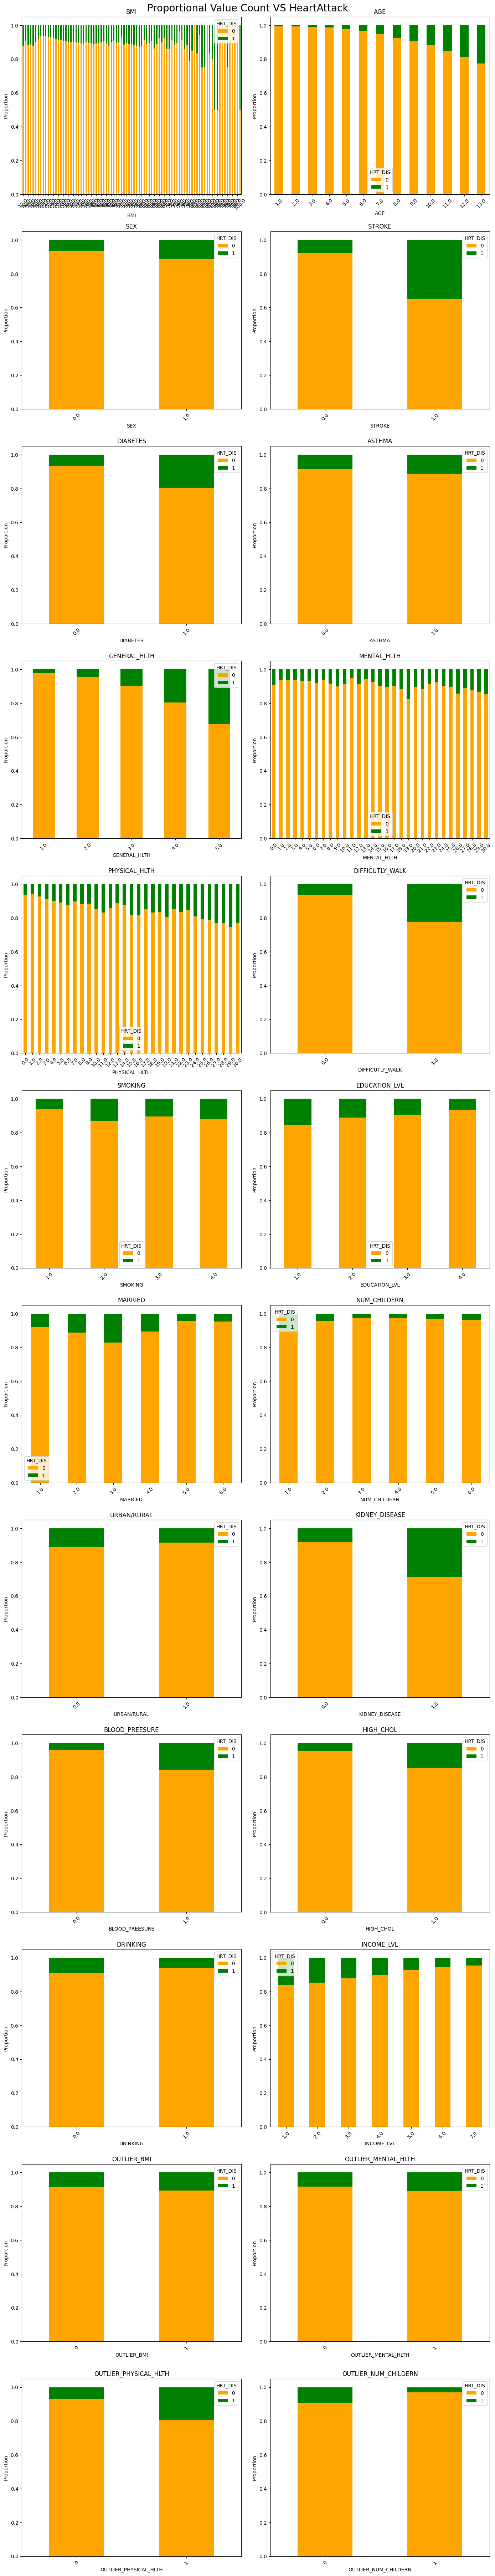

In [ ]:
plt.figure(figsize=(14, 6 * (df.shape[1] - 1)))  # Adjusting height based on the number of columns
for i, column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns) - 1, 2, i + 1)

    # Calculate the normalized count
    count_data = df.groupby(column, observed=False)['HRT_DIS'].value_counts(normalize=True).unstack().fillna(0)

    # Create a bar plot
    count_data.plot(kind='bar', stacked=True, color=['orange', 'green'], ax=plt.gca())

    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title='HRT_DIS', labels=['0', '1'])
    plt.tight_layout()

plt.suptitle("Proportional Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
plt.show()

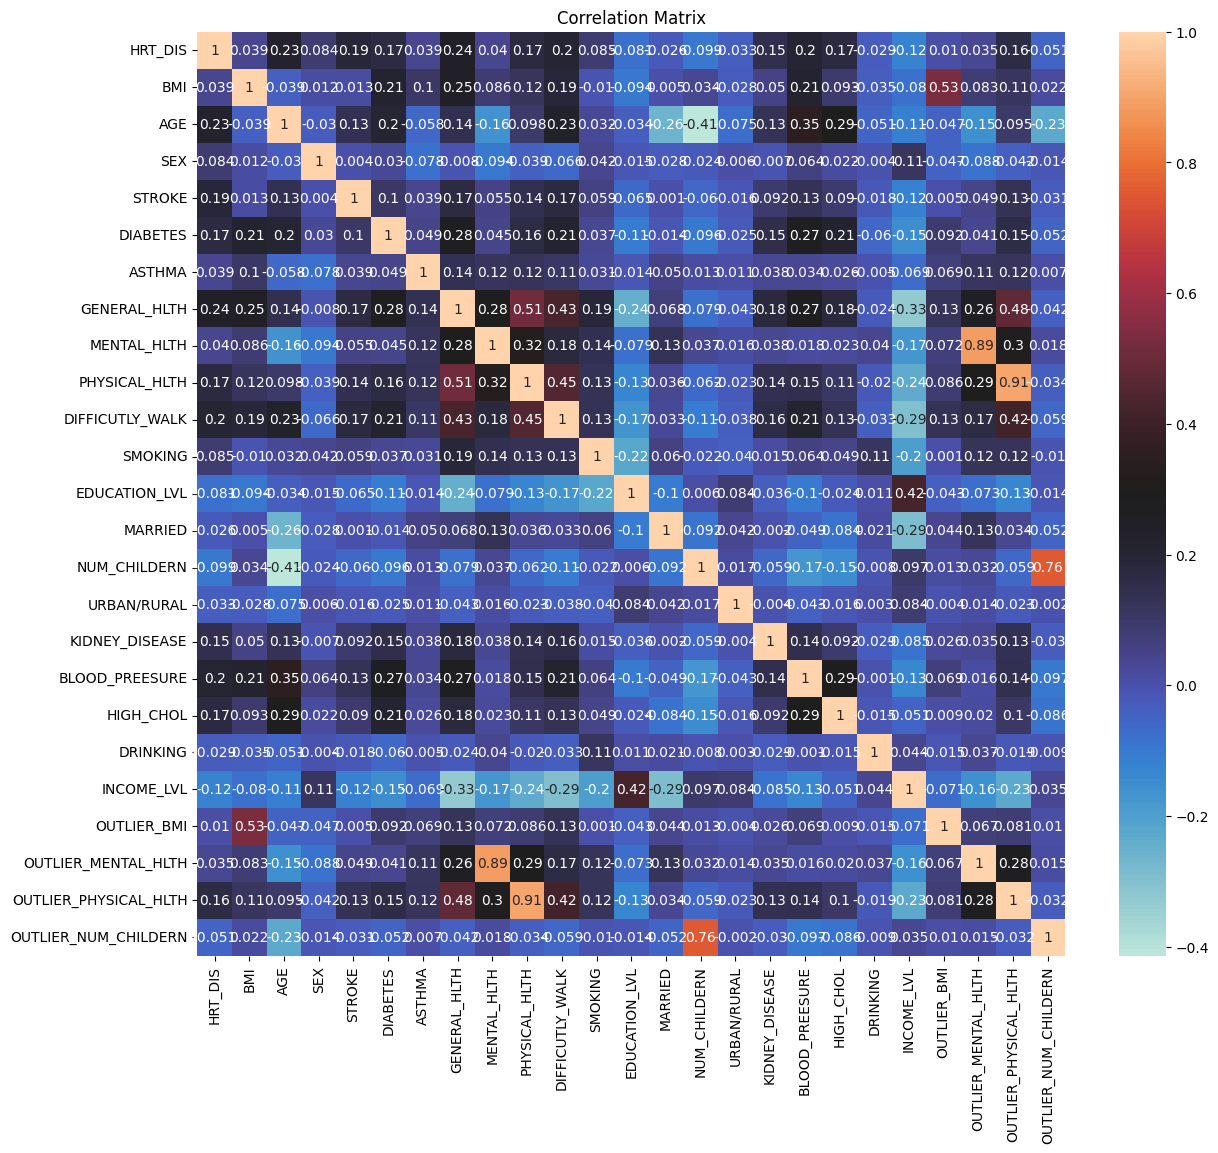

In [ ]:
# Correlation Matrix

plt.figure(figsize=(14,12))
corr_matrix = df.corr().round(3)
sns.heatmap(corr_matrix, annot=True, cmap='icefire')
plt.title('Correlation Matrix')
plt.show()

# **6. Machine Learning**

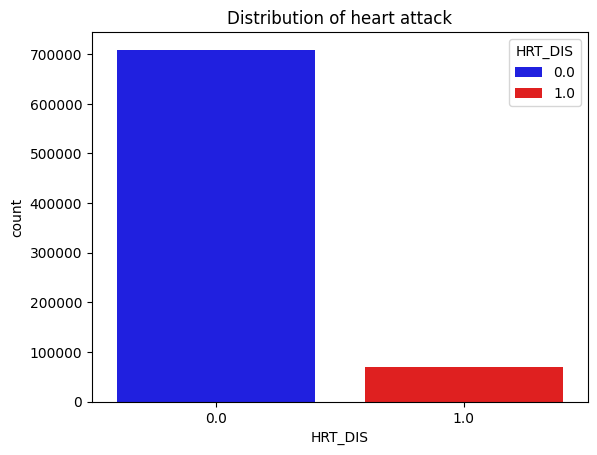

In [ ]:
# Data Proportion Heart Disease Distribution in Data

sns.countplot(data=df, x="HRT_DIS", hue='HRT_DIS', palette=['blue', 'red'])
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
 df.corr()['HRT_DIS'].sort_values(ascending=False)

,HRT_DIS
HRT_DIS,1.000000
GENERAL_HLTH,0.238777
AGE,0.224880
BLOOD_PREESURE,0.204438
DIFFICUTLY_WALK,0.201972
STROKE,0.190637
HIGH_CHOL,0.174568
PHYSICAL_HLTH,0.174069
DIABETES,0.171184
OUTLIER_PHYSICAL_HLTH,0.162456


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['HRT_DIS'])
y = df['HRT_DIS']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=17)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to pandas DataFrame
X_newdf = pd.DataFrame(X_resampled, columns=X.columns)
y_newseries = pd.Series(y_resampled, name=y.name)
newdf = pd.concat([X_newdf, y_newseries], axis=1)

In [ ]:
df.shape

(778235, 25)

In [ ]:
newdf.shape

(1417822, 25)

In [ ]:
X=newdf.drop(columns=['HRT_DIS','DRINKING','MARITAL_STATE','MENTHLTH_BAD'])
y=newdf['HRT_DIS']

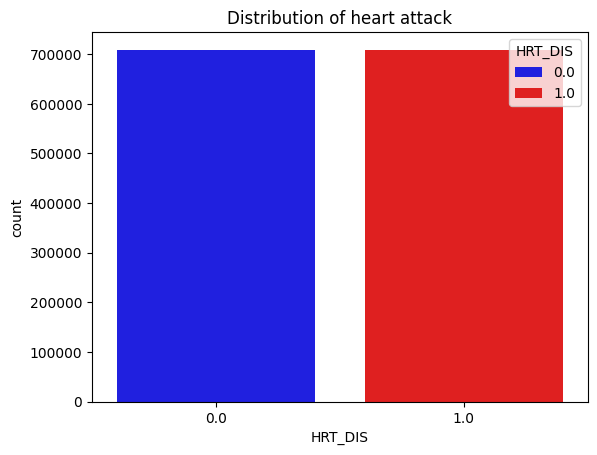

In [ ]:
# Data Proportion Heart Disease Distribution in Data

sns.countplot(data=newdf, x="HRT_DIS", hue='HRT_DIS', palette=['blue', 'red'])
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Ada Boosting':AdaBoostClassifier(),
    "XGBClassifier":XGBClassifier()
}

Training Logistic Regression...
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77    176716
         1.0       0.76      0.81      0.78    177740

    accuracy                           0.78    354456
   macro avg       0.78      0.78      0.78    354456
weighted avg       0.78      0.78      0.78    354456

Logistic Regression Accuracy: 77.79%



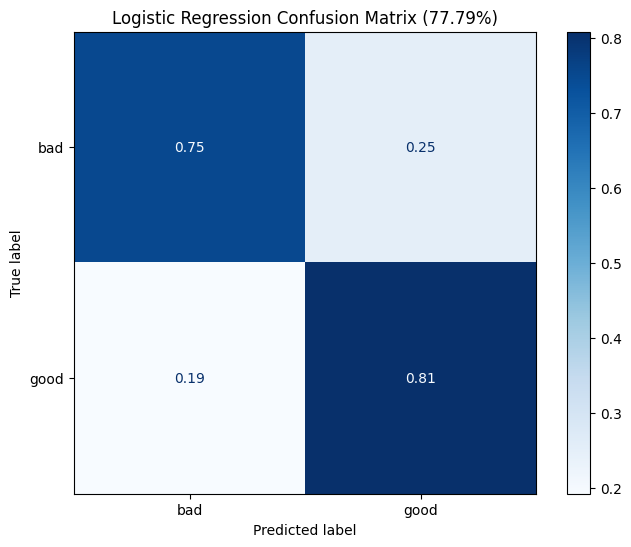

Training KNN...
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.89    176716
         1.0       0.87      0.93      0.90    177740

    accuracy                           0.89    354456
   macro avg       0.90      0.89      0.89    354456
weighted avg       0.90      0.89      0.89    354456

KNN Accuracy: 89.30%



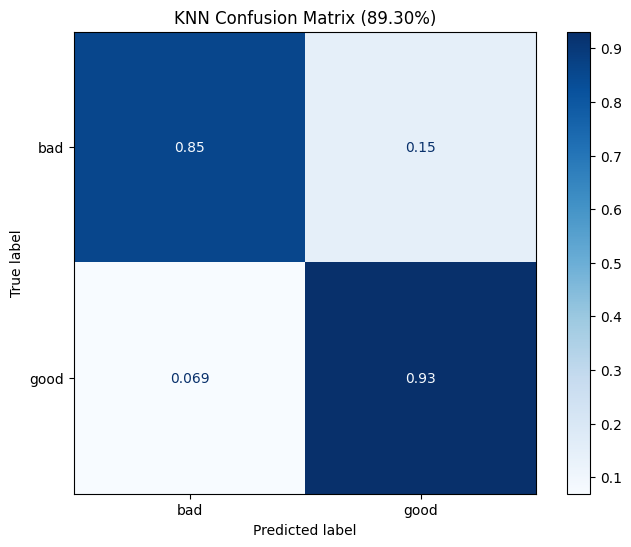

Training Decision Tree...
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    176716
         1.0       0.92      0.92      0.92    177740

    accuracy                           0.92    354456
   macro avg       0.92      0.92      0.92    354456
weighted avg       0.92      0.92      0.92    354456

Decision Tree Accuracy: 91.97%



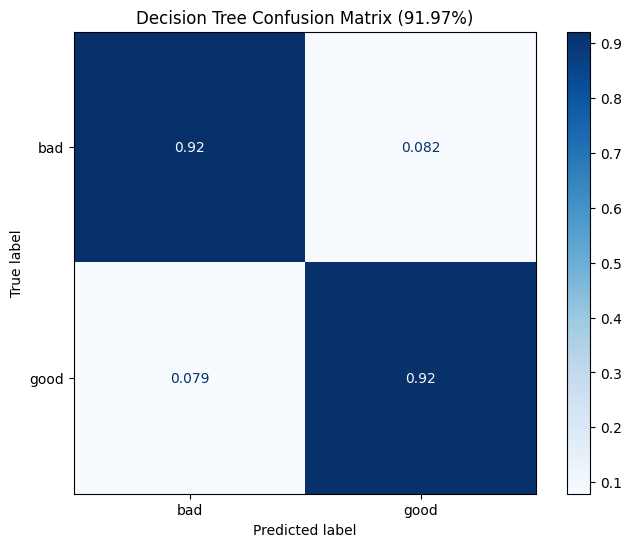

Training Random Forest...
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    176716
         1.0       0.97      0.92      0.94    177740

    accuracy                           0.95    354456
   macro avg       0.95      0.95      0.95    354456
weighted avg       0.95      0.95      0.95    354456

Random Forest Accuracy: 94.58%



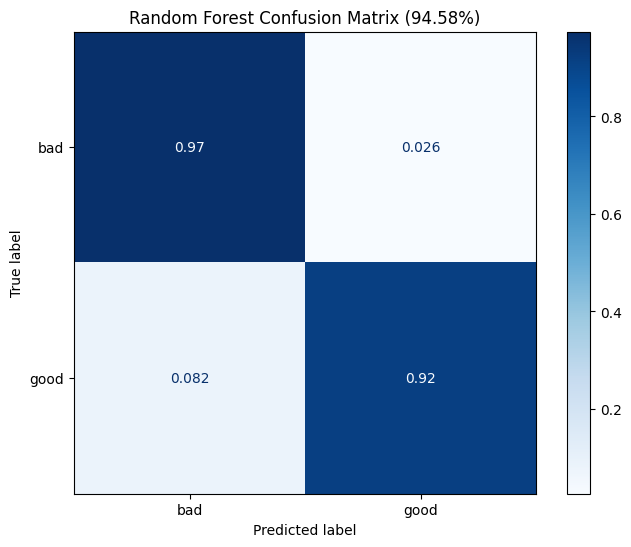

Training Bagging...
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94    176716
         1.0       0.96      0.92      0.94    177740

    accuracy                           0.94    354456
   macro avg       0.94      0.94      0.94    354456
weighted avg       0.94      0.94      0.94    354456

Bagging Accuracy: 93.86%



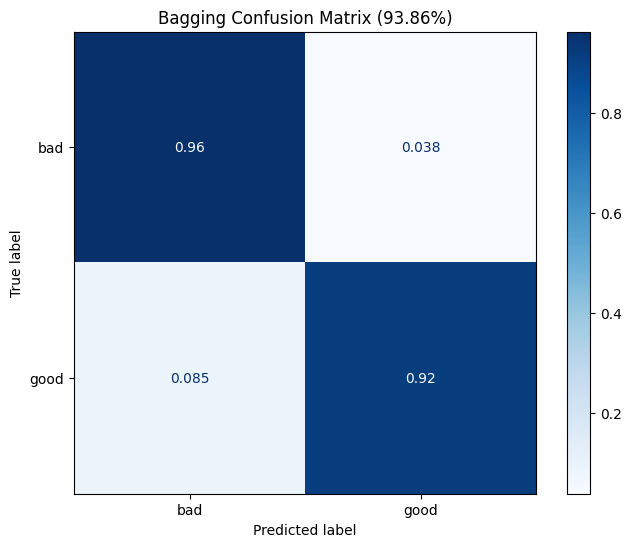

Training Ada Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89    176716
         1.0       0.90      0.88      0.89    177740

    accuracy                           0.89    354456
   macro avg       0.89      0.89      0.89    354456
weighted avg       0.89      0.89      0.89    354456

Ada Boosting Accuracy: 89.13%



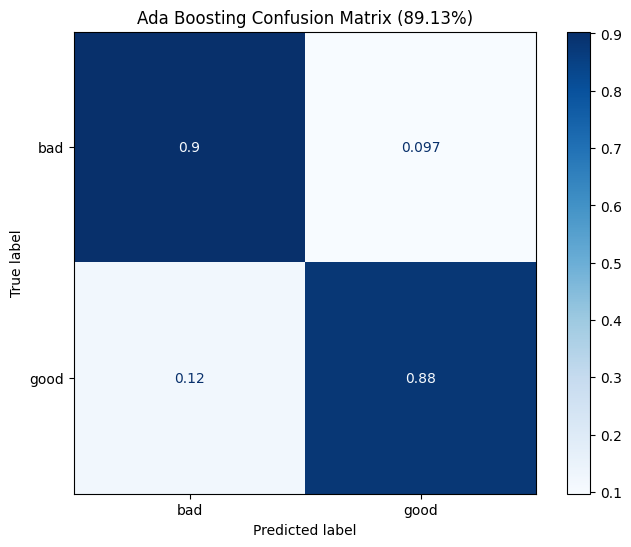

Training XGBClassifier...
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95    176716
         1.0       0.99      0.90      0.94    177740

    accuracy                           0.94    354456
   macro avg       0.95      0.94      0.94    354456
weighted avg       0.95      0.94      0.94    354456

XGBClassifier Accuracy: 94.40%



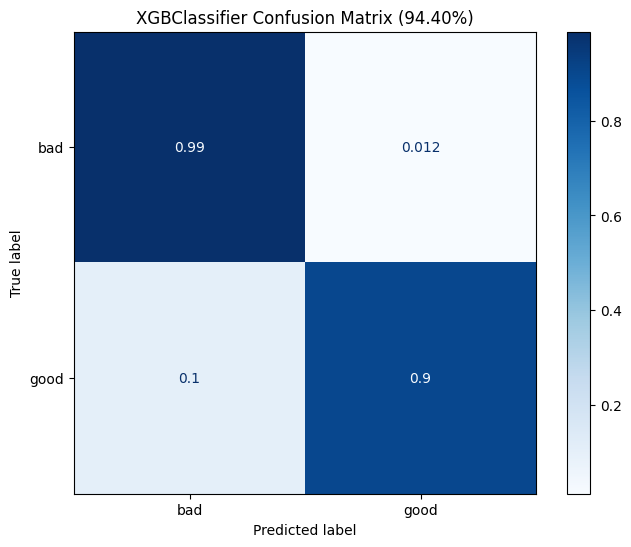

In [ ]:
accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    print(classification_report(y_test, y_pred))
    print(f"{name} Accuracy: {accuracy * 100:.2f}%\n")

    cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad','good'], )
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_title(f"{name} Confusion Matrix ({accuracy * 100:.2f}%)")
    disp.plot(ax=ax,cmap='Blues')
    plt.show()

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    176716
         1.0       0.96      0.92      0.94    177740

    accuracy                           0.94    354456
   macro avg       0.94      0.94      0.94    354456
weighted avg       0.94      0.94      0.94    354456

StackingClassifier Accuracy: 94.15%



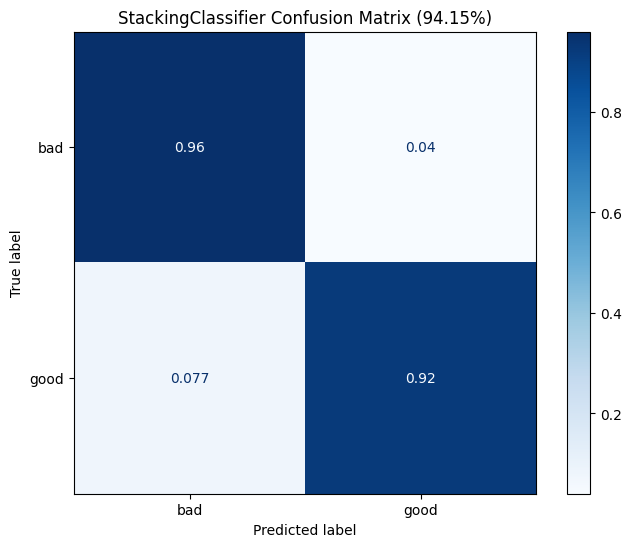

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier,StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=17)),
    ('bc', BaggingClassifier(n_estimators=10, random_state=17))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies['StackingClassifier'] = accuracy

models.update({'StackingClassifier':stacking_clf})

print(classification_report(y_test, y_pred))
print(f"StackingClassifier Accuracy: {accuracy * 100:.2f}%\n")

cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad','good'], )
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title(f"StackingClassifier Confusion Matrix ({accuracy * 100:.2f}%)")
disp.plot(ax=ax,cmap='Blues')
plt.show()

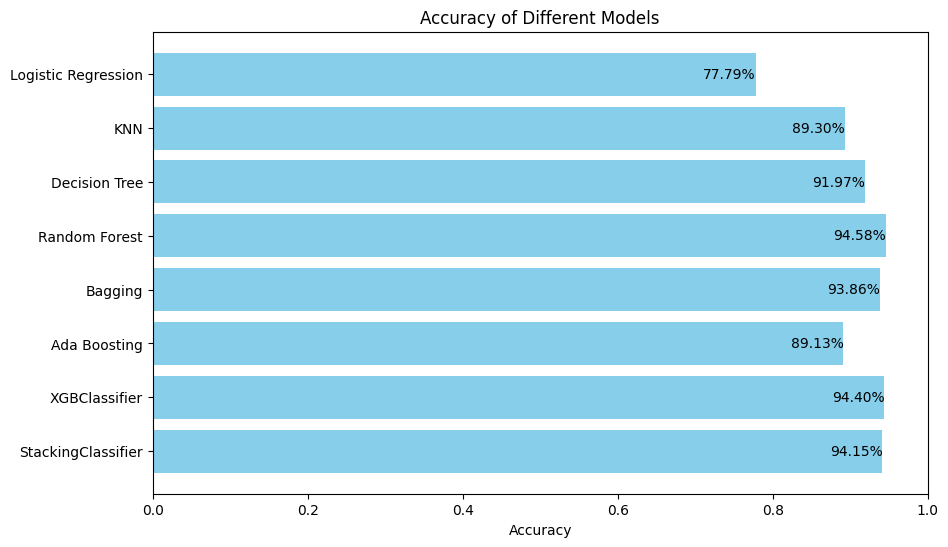

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2, f'{width* 100:.2f}%', ha='right', va='center')

plt.show()
